<a href="https://colab.research.google.com/github/heesukjang/W207_AppliedML_Fall2022/blob/main/11_26_hp_tuning_merged_transfer_learning_with_stratifiedKFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import time
import random
import joblib
import glob
import random
from itertools import product
import gc
import subprocess
import shutil
import copy
import statistics as st
from scipy import stats

from imutils import rotate as rotate
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from skimage.color import gray2rgb
import skimage.io as skio

from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, cohen_kappa_score, zero_one_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV

# from tensorflow.keras.preprocessing.image import array_to_img
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import save_img

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
#from livelossplot import PlotLossesKeras

from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Multiply
# from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, Input, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import PReLU, ReLU, LeakyReLU
from keras.layers.core import Activation
from keras.layers.convolutional import SeparableConv1D
from keras.layers.convolutional import SeparableConv2D 
from keras.layers.core import Activation
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, RMSprop
from tensorflow.keras.models import Sequential

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import *
from keras.applications.resnet import ResNet152
from keras.applications.nasnet import NASNetMobile
from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import preprocess_input
from keras.applications import MobileNetV2
from keras.applications.xception import Xception
from keras.applications.inception_v3 import *


from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, save_img
from tensorflow.python.ops.numpy_ops import np_config
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

from keras.models import Model
from tensorflow.keras.regularizers import l2
from keras.models import load_model
from tensorflow.keras.applications import ResNet152V2, VGG16, VGG19

tf.get_logger().setLevel('INFO')

import cv2 as cv
import skimage.io as io

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=DeprecationWarning)

# Required to read the data from Kaggle
from google.colab import drive
# drive.mount('/content/gdrive')
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# random_state = 1234

# def build_transfer_learning_model(chosen_modelel):
#     """
#     This function utilizes transfer learning of a given model.
#     """
#     tf.random.set_seed(random_state)
#     np.random.seed(random_state)
#     tf.keras.backend.clear_session()
#     input_shape = (IMG_SIZE, IMG_SIZE, 3)
#     if chosen_model == 'VGG19':
#         model_tl = VGG19(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     elif chosen_model == 'DenseNet201':
#         model_tl = tf.keras.applications.densenet.DenseNet201(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     elif chosen_model == 'ResNet50':
#         model_tl = tf.keras.applications.resnet50.ResNet50(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     elif chosen_model == 'VGG16':
#         model_tl = VGG16(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     elif chosen_model == 'EfficientNetB7':
#         model_tl = tf.keras.applications.efficientnet.EfficientNetB7(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     elif chosen_model == 'MobileNet':
#         model_tl = tf.keras.applications.MobileNet(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     elif chosen_model == 'Xception':
#         model_tl = tf.keras.applications.Xception(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     elif chosen_model == 'InceptionV3':
#         model_tl = tf.keras.applications.InceptionV3(weights = 'imagenet', include_top = False, input_shape = input_shape)
#     return model_tl


In [ ]:
# chosen_model = 'ResNet50'
# IMG_SIZE = 96
# dropout_rate = .5

In [ ]:
# random_state = 1234

# model_tl = build_transfer_learning_model(chosen_model = chosen_model)
# model_tl.trainable = False
        
# # Plug the pre-trained model to custom model
# print(f"Plugging in the pretainined model for {chosen_model} to custom model")
# try:
#     del model
# except:
#     None
# input_shape = (IMG_SIZE, IMG_SIZE, 3)
# inputs = tf.keras.Input(input_shape)
# m_tltl = tf.keras.layers.GlobalAveragePooling2D()(model_tl(inputs))
# m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
# m_tl = tf.keras.layers.Dense(512, activation = 'relu')(m_tl)
# m_tl = tf.keras.layers.BatchNormalization()(m_tl)
# m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
# m_tl = tf.keras.layers.Dense(256, activation = 'relu')(m_tl)
# m_tl = tf.keras.layers.BatchNormalization()(m_tl)
# m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
# m_tl = tf.keras.layers.Flatten()(m_tl)
# m_tl = tf.keras.layers.Dense(1, activation = None)(m_tl)
# model = tf.keras.Model(inputs = inputs, outputs = m_tl)

In [ ]:
# tf.keras.utils.plot_model(model)

In [ ]:
!unzip gdrive/MyDrive/Kaggle/CNN_IDC/Dataset.zip                  

Archive:  gdrive/MyDrive/Kaggle/CNN_IDC/Dataset.zip
   creating: Dataset/
   creating: Dataset/Validate/
  inflating: Dataset/.DS_Store       
  inflating: __MACOSX/Dataset/._.DS_Store  
   creating: Dataset/Test/
   creating: Dataset/Train/
  inflating: Dataset/Validate/.DS_Store  
  inflating: __MACOSX/Dataset/Validate/._.DS_Store  
   creating: Dataset/Validate/0/
   creating: Dataset/Validate/1/
  inflating: Dataset/Test/.DS_Store  
  inflating: __MACOSX/Dataset/Test/._.DS_Store  
   creating: Dataset/Test/0/
   creating: Dataset/Test/1/
  inflating: Dataset/Train/.DS_Store  
  inflating: __MACOSX/Dataset/Train/._.DS_Store  
   creating: Dataset/Train/0/
   creating: Dataset/Train/1/
  inflating: Dataset/Validate/0/12867_idx5_x651_y1801_class0.png  
  inflating: __MACOSX/Dataset/Validate/0/._12867_idx5_x651_y1801_class0.png  
  inflating: Dataset/Validate/0/16165_idx5_x3001_y1551_class0.png  
  inflating: __MACOSX/Dataset/Validate/0/._16165_idx5_x3001_y1551_class0.png  
  inflating

In [ ]:
# delete a full folder including all its files and subfolders
!rm -rf processed_images/                    

In [ ]:
!ls -ltr Dataset

total 12
drwxr-xr-x 4 root root 4096 Oct  4 01:10 Test
drwxr-xr-x 4 root root 4096 Oct  4 01:10 Train
drwxr-xr-x 4 root root 4096 Oct  4 01:10 Validate


In [ ]:
# ls -ltr: List the contents of the current directory in the long listing format ( -l ), 
#   sorted by modification time ( -t ) in reverse order ( -r ) of all files and directories beginning with file* .
# wc -l: count the number of lines

!ls -ltr Dataset/Train/0|wc -l
!ls -ltr Dataset/Train/1|wc -l

!ls -ltr Dataset/Test/0|wc -l
!ls -ltr Dataset/Test/1|wc -l

!ls -ltr Dataset/Validate/0|wc -l
!ls -ltr Dataset/Validate/1|wc -l

401
401
101
101
101
101


In [ ]:
val_image_directory = '/content/Dataset/Validate'
train_image_directory = '/content/Dataset/Train'
test_image_directory = '/content/Dataset/Test'
directory_path = '/content/Dataset'

tgt_directory_path = '/content/processed_images'
tgt_train_1_image_path = '/content/processed_images/train/1/'
tgt_train_0_image_path = '/content/processed_images/train/0/'
tgt_val_1_image_path = '/content/processed_images/val/1/'
tgt_val_0_image_path = '/content/processed_images/val/0/'
tgt_test_1_image_path = '/content/processed_images/test/1/'
tgt_test_0_image_path = '/content/processed_images/test/0/'

tgt_path_list = [tgt_train_1_image_path, tgt_train_0_image_path,
                 tgt_val_1_image_path, tgt_val_0_image_path,
                 tgt_test_1_image_path, tgt_test_0_image_path
                ]

In [ ]:
train_1_images_path = [train_image_directory + '/' +  dir + '/' for dir in os.listdir(train_image_directory) if dir != '.DS_Store'][0]
train_0_images_path = [train_image_directory + '/' +  dir + '/' for dir in os.listdir(train_image_directory) if dir != '.DS_Store'][1]

test_1_images_path = [test_image_directory + '/' +  dir + '/' for dir in os.listdir(test_image_directory) if dir != '.DS_Store'][0]
test_0_images_path = [test_image_directory + '/' +  dir + '/' for dir in os.listdir(test_image_directory) if dir != '.DS_Store'][1]

val_1_images_path = [val_image_directory + '/' +  dir + '/' for dir in os.listdir(val_image_directory) if dir != '.DS_Store'][0]
val_0_images_path = [val_image_directory + '/' +  dir + '/' for dir in os.listdir(val_image_directory) if dir != '.DS_Store'][1]

In [ ]:
train_1_images_list = [train_1_images_path + file for file in list(os.walk(train_1_images_path))[0][2] if file[0] != '.']
train_0_images_list = [train_0_images_path + file for file in list(os.walk(train_0_images_path))[0][2] if file[0] != '.']

test_1_images_list = [test_1_images_path + file for file in list(os.walk(test_1_images_path))[0][2] if file[0] != '.']
test_0_images_list = [test_0_images_path + file for file in list(os.walk(test_0_images_path))[0][2] if file[0] != '.']

val_1_images_list = [val_1_images_path + file for file in list(os.walk(val_1_images_path))[0][2] if file[0] != '.']
val_0_images_list = [val_0_images_path + file for file in list(os.walk(val_0_images_path))[0][2] if file[0] != '.']

In [ ]:
len(train_1_images_list + train_0_images_list + test_1_images_list + test_0_images_list + val_1_images_list + val_0_images_list)

1200

In [ ]:
len(train_1_images_list), len(train_0_images_list), len(test_1_images_list), len(test_0_images_list), len(val_1_images_list), len(val_0_images_list)

(400, 400, 100, 100, 100, 100)

In [ ]:
test_img = load_img(train_1_images_list[0], color_mode ="grayscale")
test_img_arry = img_to_array(test_img)
print(type(test_img))
print(test_img.format)
print(test_img.mode)
print(test_img.size)
print(test_img.getbands())
print(test_img_arry.shape)
print("****")
test_img1 = load_img(train_1_images_list[0])
test_img1_arry = img_to_array(test_img1)
print(test_img1_arry.shape)
print(test_img1.getbands())

<class 'PIL.Image.Image'>
None
L
(50, 50)
('L',)
(50, 50, 1)
****
(50, 50, 3)
('R', 'G', 'B')


## Display the first 5 images for each class
: IDC Malignant (1) vs. IDC Benign (0)


In [ ]:
IMG_SIZE = 50

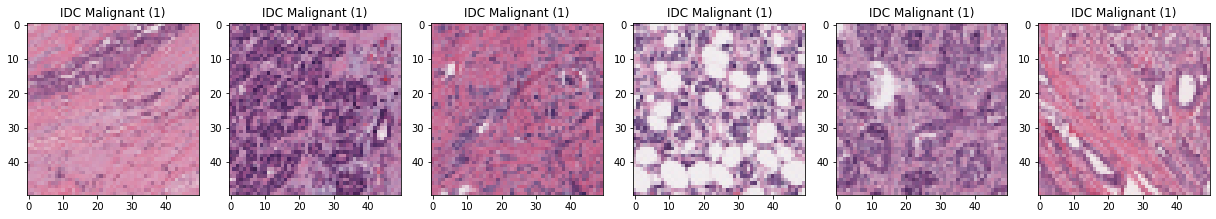

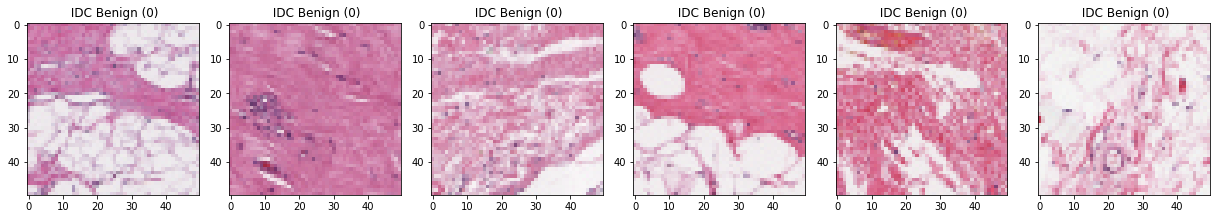

In [ ]:
def display_images(subclass, class_name):
  fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17,6))
  for idx, ax in enumerate(axes.flat):
    img = io.imread(subclass[idx])
    img = cv.resize(img, (IMG_SIZE, IMG_SIZE))    # resize an image from 50 by 50 to 512 by 512
    ax.imshow(img)
    ax.set_title(class_name)
    # ax.set_xticks([])       # remove xticks passing an empty array
    # ax.set_yticks([])       # remove yticks passing an empty array
  fig.tight_layout() 
  plt.show() 

display_images(train_1_images_list, 'IDC Malignant (1)')
display_images(train_0_images_list, ' IDC Benign (0)')

In [ ]:
# from google.colab.patches import cv2_imshow

# RESIZED_SIZE = 62

# fig = plt.figure(figsize=(22,9))

# # orig_gs = load_img(train_1_images_list[0], color_mode ="grayscale")
# # arr_orig_gs = img_to_array(orig_gs)

# orig_cs = load_img(train_1_images_list[0], color_mode ="rgb")
# arr_orig_cs = img_to_array(orig_cs)

# # =============== Original =================================
# original = io.imread(train_1_images_list[0], as_gray=False)
# ax = fig.add_subplot(2,5,1)
# ax.imshow(original)
# ax.set_title(f"Original: {IMG_SIZE} X {IMG_SIZE}", size=14)

# # # =============== Resize =================================
# resize = cv.resize(original, (RESIZED_SIZE,RESIZED_SIZE))
# # cv.resize(img, (IMG_SIZE, IMG_SIZE))
# ax = fig.add_subplot(2,5,2)
# ax.imshow(resize)
# ax.set_title(f"Resize: {RESIZED_SIZE} X {RESIZED_SIZE}", size=14)

# # =============== Horizontal Flip =========================
# h_flip = cv2.flip(original, 1)
# ax = fig.add_subplot(2,5,3)
# ax.imshow(h_flip)
# ax.set_title(f"Horizontal Flip", size=14)

# # =============== Vertical Flip ===========================
# v_flip = cv2.flip(original, 0)
# ax = fig.add_subplot(2,5,4)
# ax.imshow(v_flip)
# ax.set_title(f"Vertical Flip", size=14)

# # # =============== Rotation 45 =============================
# rot_45 = int(random.uniform(-45, 45))
# print('rot_45', rot_45)
# # # h, w = arr_orig_cs.shape[:2]
# # # print('h, w', h, w)
# # M = cv2.getRotationMatrix2D((int(IMG_SIZE/2), int(IMG_SIZE/2)), rot_45, 1)
# # rotated_img_gs = cv2.warpAffine(arr_orig_cs, M, (w, h))
# # rotated_img_gs = img_to_array(rotated_img_gs)
# # print("rot45****")
# ax = fig.add_subplot(2,5,5)
# # ax.imshow(rotated_img_gs)
# # cv2_imshow(rotated_img_gs)

# rot90_img = tf.image.rot90(original, k=1)
# ax.imshow(rot90_img)
# # ax.axis('off')
# ax.set_title('Rotate 90', size=14)


# resized = cv2.resize(test_img_arry, (224, 224), interpolation = cv2.INTER_AREA) 
# print('Resized Dimensions : ',resized.shape) 
# cv2_imshow(resized)

# # =============== Rotation 90 =============================
# angle = int(random.uniform(-90, 90))
# print('angle', angle)
# # h, w = test_img_arry.shape[:2]
# # M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
# # rotated_img_gs = cv2.warpAffine(test_img_arry, M, (w, h))
# # rotated_img_gs = img_to_array(rotated_img_gs)
# # print("rot90****")
# # cv2_imshow(rotated_img_gs)
# # print();cv2_imshow(arr_original)

# # =============== Rotation 180 ============================
# # angle = int(random.uniform(-180, 180))
# # h, w = test_img_arry.shape[:2]
# # M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
# # rotated_img_gs = cv2.warpAffine(test_img_arry, M, (w, h))
# # rotated_img_gs = img_to_array(rotated_img_gs)
# # print("rot180****")
# # cv2_imshow(rotated_img_gs)

# # # rotate ccw
# # out=cv2.transpose(test_img_arry)
# # out=cv2.flip(out,flipCode=0)
# # rotated_img_gs = img_to_array(out)
# # print("90ccwrot****")
# # cv2_imshow(out)

# # out=cv2.transpose(test_img_arry)
# # out=cv2.flip(out,flipCode=1)
# # rotated_img_gs = img_to_array(out)
# # print("90rot****")
# # cv2_imshow(out)


original****


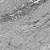

vflip****


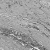

hflip****


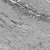

rot90****


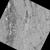

rot45****


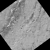

rot180****


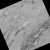

90ccwrot****


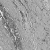

90rot****


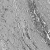

In [ ]:
from google.colab.patches import cv2_imshow

test_img = load_img(train_1_images_list[0], color_mode ="grayscale")
test_img_arry = img_to_array(test_img_arry)
print("original****")
cv2_imshow(test_img_arry)

hflip_img_gs = cv2.flip(test_img_arry, 1)
vflip_img_gs = cv2.flip(test_img_arry, 0)
print("vflip****")
cv2_imshow(vflip_img_gs)
print("hflip****")
cv2_imshow(hflip_img_gs)

angle = int(random.uniform(-90, 90))
h, w = test_img_arry.shape[:2]
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
rotated_img_gs = cv2.warpAffine(test_img_arry, M, (w, h))
rotated_img_gs = img_to_array(rotated_img_gs)
print("rot90****")
cv2_imshow(rotated_img_gs)

angle = int(random.uniform(-45, 45))
h, w = test_img_arry.shape[:2]
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
rotated_img_gs = cv2.warpAffine(test_img_arry, M, (w, h))
rotated_img_gs = img_to_array(rotated_img_gs)
print("rot45****")
cv2_imshow(rotated_img_gs)

angle = int(random.uniform(-180, 180))
h, w = test_img_arry.shape[:2]
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
rotated_img_gs = cv2.warpAffine(test_img_arry, M, (w, h))
rotated_img_gs = img_to_array(rotated_img_gs)
print("rot180****")
cv2_imshow(rotated_img_gs)

# rotate ccw
out=cv2.transpose(test_img_arry)
out=cv2.flip(out,flipCode=0)
rotated_img_gs = img_to_array(out)
print("90ccwrot****")
cv2_imshow(out)

out=cv2.transpose(test_img_arry)
out=cv2.flip(out,flipCode=1)
rotated_img_gs = img_to_array(out)
print("90rot****")
cv2_imshow(out)

Resized Dimensions :  (224, 224)


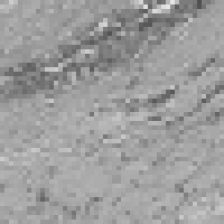

In [ ]:
resized = cv2.resize(test_img_arry, (224, 224), interpolation = cv2.INTER_AREA) 
print('Resized Dimensions : ',resized.shape) 
cv2_imshow(resized)

In [ ]:
odd_images = []
def extract_odd_images(file_list, IMG_SIZE = 50):
    for file_name in file_list:
        test_img = load_img(file_name, color_mode ="grayscale")
        test_img_arry = img_to_array(test_img)
        if test_img_arry.shape[0] != IMG_SIZE or test_img_arry.shape[1] != IMG_SIZE:
            odd_images.append(file_name)

In [ ]:
extract_odd_images(train_1_images_list + train_0_images_list + test_1_images_list + test_0_images_list + val_1_images_list + val_0_images_list)

In [ ]:
odd_images

['/content/Dataset/Train/0/9347_idx5_x2101_y801_class0.png',
 '/content/Dataset/Train/0/12954_idx5_x1651_y2951_class0.png',
 '/content/Dataset/Train/0/13106_idx5_x1_y2951_class0.png',
 '/content/Dataset/Test/0/13404_idx5_x1101_y2901_class0.png',
 '/content/Dataset/Validate/0/9320_idx5_x801_y2951_class0.png',
 '/content/Dataset/Validate/0/12931_idx5_x1901_y2151_class0.png',
 '/content/Dataset/Validate/0/13694_idx5_x1551_y2801_class0.png']

In [ ]:
train_0_images_list[:5]

['/content/Dataset/Train/0/10291_idx5_x3251_y401_class0.png',
 '/content/Dataset/Train/0/9078_idx5_x2201_y2001_class0.png',
 '/content/Dataset/Train/0/9176_idx5_x701_y2101_class0.png',
 '/content/Dataset/Train/0/8956_idx5_x1901_y1051_class0.png',
 '/content/Dataset/Train/0/15903_idx5_x551_y1501_class0.png']

In [ ]:
train_1_images_list[0].split("/")[-1], train_1_images_list[0][:train_1_images_list[0].rfind("/") + 1]

('12817_idx5_x1801_y901_class1.png', '/content/Dataset/Train/1/')

In [ ]:
!rm -rf processed_images

In [ ]:
root_dir = 'processed_images'

os.makedirs(f'{root_dir}', exist_ok = True)
for dir in ['train', 'val', 'test']:
    for sub_dir in ['1', '0']:
        os.makedirs(f'{root_dir}/{dir}/{sub_dir}', exist_ok=True)

# Image Augmentation

In [ ]:
def create_gs_files(file_list, dest_dir, ind):
  # print(file_list, dest_dir, ind)
  lst_train_1_gs, lst_train_0_gs = [], []
  lst_val_1_gs, lst_val_0_gs = [], []
  lst_test_1_gs, lst_test_0_gs = [], []

  file_extension = '.png'
  for image_file in file_list:
      #print(image_file)
      if image_file[0] == '.' or image_file in odd_images:                                     # if image_file = .DS_Store or an odd image then ignore
          continue
      img_gs = load_img(image_file, color_mode = "grayscale")                                     # convert images from colorscale to grayscale
      img_array_gs = img_to_array(img_gs)                                                         # convert grayscale images to array
      #print("a")
      #img_array_gs = cv2.resize(img_array_gs, (224, 224), interpolation = cv2.INTER_AREA)
      
      file_name = image_file.split("/")[-1]                                                       # extract only filenames from the full file path
      save_img(dest_dir + file_name.split(".")[0] + '_gs' + file_extension, img_array_gs)
      if ind == 1:
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_gs' + file_extension)
          
          hflip_img_gs = cv2.flip(img_array_gs, 1)
          img_array_hflip_gs = img_to_array(hflip_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_hflip_gs' + file_extension, img_array_hflip_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_hflip_gs' + file_extension)
          #print("b")

          vflip_img_gs = cv2.flip(img_array_gs, 0)
          img_array_vflip_gs = img_to_array(vflip_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_vflip_gs' + file_extension, img_array_vflip_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_vflip_gs' + file_extension)
          #print("c")
          '''
          angle = int(random.uniform(-90, 90))
          h, w = img_array_gs.shape[:2]
          M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
          rotated_img_gs = cv2.warpAffine(img_array_gs, M, (w, h))
          img_array_rotated_gs = img_to_array(rotated_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rotated_gs' + file_extension, img_array_rotated_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_90rotated_gs' + file_extension)

          angle = int(random.uniform(-279, 270))
          h, w = img_array_gs.shape[:2]
          M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
          rotated_img_gs = cv2.warpAffine(img_array_gs, M, (w, h))
          img_array_rotated_gs = img_to_array(rotated_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_270rotated_gs' + file_extension, img_array_rotated_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_270rotated_gs' + file_extension)
          
          img_90rot_gs = cv2.rotate(img_gs, cv2.cv2.ROTATE_90_CLOCKWISE)
          img_array_90rot_gs = img_to_array(img_90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension, img_array_90rot_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension)
          
          img_180rot_gs = cv2.rotate(img_gs, cv2.cv2.ROTATE_180_CLOCKWISE)
          img_array_180rot_gs = img_to_array(img_180rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_180rot_gs' + file_extension, img_array_180rot_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_180rot_gs' + file_extension)

          img_270rot_gs = cv2.rotate(img_gs, cv2.cv2.ROTATE_270_CLOCKWISE)
          img_array_270rot_gs = img_to_array(img_90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension, img_array_270rot_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension)
          '''
          img_gs = cv2.imread(image_file, 0)
          #img_array_gs = img_to_array(img_gs)
          img_array_enhanced_gs = cv2.equalizeHist(img_gs)
          img_array_enhanced_gs = img_to_array(img_array_enhanced_gs)
          #img_array_enhanced_gs = cv2.resize(img_array_enhanced_gs, (224, 224), interpolation = cv2.INTER_AREA)
          save_img(dest_dir + file_name.split(".")[0] + '_enhance_gs' + file_extension, img_array_enhanced_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_enhanced_gs' + file_extension)
          #print("d")

          img_ccw90rot_gs = cv2.transpose(img_array_gs)
          img_ccw90rot_gs = cv2.flip(img_ccw90rot_gs, flipCode = 0)
          rotatedccw90_img_gs = img_to_array(img_ccw90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_ccw90rot_gs' + file_extension, rotatedccw90_img_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_ccw90rot_gs' + file_extension)
          #print("e")

          img_90rot_gs = cv2.transpose(img_array_gs)
          img_90rot_gs = cv2.flip(img_90rot_gs, flipCode = 1)
          rotated90_img_gs = img_to_array(img_90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension, rotated90_img_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension)
          #print("f")

      elif ind == 2:
          lst_train_0_gs.append(dest_dir + file_name.split(".")[0] + '_gs' + file_extension)
          hflip_img_gs = cv2.flip(img_array_gs, 1)
          img_array_hflip_gs = img_to_array(hflip_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_hflip_gs' + file_extension, img_array_hflip_gs)
          lst_train_0_gs.append(dest_dir + file_name.split(".")[0] + '_hflip_gs' + file_extension)
          #print("b")

          vflip_img_gs = cv2.flip(img_array_gs, 0)
          img_array_vflip_gs = img_to_array(vflip_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_vflip_gs' + file_extension, img_array_vflip_gs)
          lst_train_0_gs.append(dest_dir + file_name.split(".")[0] + '_vflip_gs' + file_extension)
          #print("c")
          '''
          angle = int(random.uniform(-90, 90))
          h, w = img_array_gs.shape[:2]
          M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
          rotated_img_gs = cv2.warpAffine(img_array_gs, M, (w, h))
          img_array_rotated_gs = img_to_array(rotated_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rotated_gs' + file_extension, img_array_rotated_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_90rotated_gs' + file_extension)

          angle = int(random.uniform(-279, 270))
          h, w = img_array_gs.shape[:2]
          M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
          rotated_img_gs = cv2.warpAffine(img_array_gs, M, (w, h))
          img_array_rotated_gs = img_to_array(rotated_img_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_270rotated_gs' + file_extension, img_array_rotated_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_270rotated_gs' + file_extension)
          
          img_90rot_gs = cv2.rotate(img_gs, cv2.cv2.ROTATE_90_CLOCKWISE)
          img_array_90rot_gs = img_to_array(img_90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension, img_array_90rot_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension)
          
          img_180rot_gs = cv2.rotate(img_gs, cv2.cv2.ROTATE_180_CLOCKWISE)
          img_array_180rot_gs = img_to_array(img_180rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_180rot_gs' + file_extension, img_array_180rot_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_180rot_gs' + file_extension)

          img_270rot_gs = cv2.rotate(img_gs, cv2.cv2.ROTATE_270_CLOCKWISE)
          img_array_270rot_gs = img_to_array(img_90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension, img_array_270rot_gs)
          lst_train_1_gs.append(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension)
          '''
          img_gs = cv2.imread(image_file, 0)
          #img_array_gs = img_to_array(img_gs)
          img_array_enhanced_gs = cv2.equalizeHist(img_gs)
          img_array_enhanced_gs = img_to_array(img_array_enhanced_gs)
          #img_array_enhanced_gs = cv2.resize(img_array_enhanced_gs, (224, 224), interpolation = cv2.INTER_AREA)
          save_img(dest_dir + file_name.split(".")[0] + '_enhance_gs' + file_extension, img_array_enhanced_gs)
          lst_train_0_gs.append(dest_dir + file_name.split(".")[0] + '_enhanced_gs' + file_extension)
          #print("d")

          img_ccw90rot_gs = cv2.transpose(img_array_gs)
          img_ccw90rot_gs = cv2.flip(img_ccw90rot_gs, flipCode = 0)
          rotatedccw90_img_gs = img_to_array(img_ccw90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_ccw90rot_gs' + file_extension, rotatedccw90_img_gs)
          lst_train_0_gs.append(dest_dir + file_name.split(".")[0] + '_ccw90rot_gs' + file_extension)
          #print("e")

          img_90rot_gs = cv2.transpose(img_array_gs)
          img_90rot_gs = cv2.flip(img_90rot_gs, flipCode = 1)
          rotated90_img_gs = img_to_array(img_90rot_gs)
          save_img(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension, rotated90_img_gs)
          lst_train_0_gs.append(dest_dir + file_name.split(".")[0] + '_90rot_gs' + file_extension)
          #print("f")
      elif ind == 3:
          lst_val_1_gs.append(dest_dir + file_name.split(".")[0] + '_gs' + file_extension)
      elif ind == 4:
          lst_val_0_gs.append(dest_dir + file_name.split(".")[0] + '_gs' + file_extension)
      elif ind == 5:
          lst_test_1_gs.append(dest_dir + file_name.split(".")[0] + '_gs' + file_extension)
      elif ind == 6:
          lst_test_0_gs.append(dest_dir + file_name.split(".")[0] + '_gs' + file_extension)
              

In [ ]:
len(os.listdir('/content/Dataset/Validate/0'))

101

In [ ]:
create_gs_files(train_1_images_list, tgt_train_1_image_path, 1)
print(len(os.listdir('/content/Dataset/Train/1')))
print(len(os.listdir(tgt_train_1_image_path)))
create_gs_files(train_0_images_list, tgt_train_0_image_path, 2)
print(len(os.listdir('/content/Dataset/Train/0')))
print(len(os.listdir(tgt_train_0_image_path)))

create_gs_files(val_1_images_list, tgt_val_1_image_path, 3)
print(len(os.listdir('/content/Dataset/Validate/1')))
print(len(os.listdir(tgt_val_1_image_path)))
create_gs_files(val_0_images_list, tgt_val_0_image_path, 4)
print(len(os.listdir('/content/Dataset/Validate/0')))
print(len(os.listdir(tgt_val_0_image_path)))

create_gs_files(test_1_images_list, tgt_test_1_image_path, 5)
print(len(os.listdir('/content/Dataset/Test/1')))
print(len(os.listdir(tgt_test_1_image_path)))
create_gs_files(test_0_images_list, tgt_test_0_image_path, 6)
print(len(os.listdir('/content/Dataset/Test/0')))
print(len(os.listdir(tgt_test_0_image_path)))

401
2400
401
2382
101
100
101
97
101
100
101
99


In [ ]:
!ls -ltr /content/Dataset/Train/1/*.png|wc -l
!ls -ltr /content/Dataset/Train/0/*.png|wc -l

400
400


In [ ]:
!ls -ltra /content/processed_images/train/1/*.png|wc -l
!ls -ltra /content/processed_images/train/0/*.png|wc -l

2400
2382


In [ ]:
# def custom_augmentation(np_tensor):
 
#     def random_contrast(np_tensor):
#         return tf.image.random_contrast(np_tensor, 0.5, 2)
 
#     def random_hue(np_tensor):
#         return tf.image.random_hue(np_tensor, 0.5)
 
#     def random_saturation(np_tensor):
#         return tf.image.random_saturation(np_tensor, 0.2, 3)
 
#     def gaussian_noise(np_tensor):
#         mean = 0
#         # variance: randomly between 1 to 25
#         var = np.random.randint(1, 26)
#         # sigma is square root of the variance value
#         noise = np.random.normal(mean,var**0.5,np_tensor.shape)
#         return np.clip(np_tensor + noise, 0, 255).astype('int')

#     augmnted_tensor = random_contrast(np_tensor)
#     augmnted_tensor = random_hue(augmnted_tensor)
#     augmnted_tensor = random_saturation(augmnted_tensor)
#     augmented_tensor = gaussian_noise(augmnted_tensor)
  
#     return np.array(augmnted_tensor)

# # Train data generator
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     #featurewise_center            = True, 
#     #featurewise_std_normalization = True,
#     rescale                       = 1.0/255
# )

# # Validation data generator
# val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     #featurewise_center            = True, 
#     #featurewise_std_normalization = True
#     rescale = 1.0/255
#     )

# # Test data generator
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     #featurewise_center            = True, 
#     #featurewise_std_normalization = True
#     rescale = 1.0/255
#     )

In [ ]:
def build_transfer_learning_model(chosen_model):
    """
    This function utilizes transfer learning of a given model.
    """
    tf.random.set_seed(random_state)
    np.random.seed(random_state)
    tf.keras.backend.clear_session()

    input_shape = (IMG_SIZE, IMG_SIZE, 3)
    if chosen_model == 'VGG19':
        model_tl = VGG19(weights = 'imagenet', include_top = False, input_shape = input_shape)
    elif chosen_model == 'DenseNet201':
        model_tl = tf.keras.applications.densenet.DenseNet201(weights = 'imagenet', include_top = False, input_shape = input_shape)
    elif chosen_model == 'ResNet50':
        model_tl = tf.keras.applications.resnet50.ResNet50(weights = 'imagenet', include_top = False, input_shape = input_shape)
    elif chosen_model == 'VGG16':
        model_tl = VGG16(weights = 'imagenet', include_top = False, input_shape = input_shape)
    elif chosen_model == 'EfficientNetB7':
        model_tl = tf.keras.applications.efficientnet.EfficientNetB7(weights = 'imagenet', include_top = False, input_shape = input_shape)
    elif chosen_model == 'MobileNet':
        model_tl = tf.keras.applications.MobileNet(weights = 'imagenet', include_top = False, input_shape = input_shape)
    elif chosen_model == 'Xception':
        model_tl = tf.keras.applications.Xception(weights = 'imagenet', include_top = False, input_shape = input_shape)
    elif chosen_model == 'InceptionV3':
        model_tl = tf.keras.applications.InceptionV3(weights = 'imagenet', include_top = False, input_shape = input_shape)
    return model_tl

In [ ]:
# chosen_model = 'MobileNetV2'

# model_tl = build_transfer_learning_model(chosen_model = chosen_model)
# model_tl.trainable = False
        
# # Plug the pre-trained model to custom model
# print(f"Plugging in the pretainined model for {chosen_model} to custom model")

# try:
#     del model
# except:
#     None
# input_shape = (IMG_SIZE, IMG_SIZE, 3)
# inputs = tf.keras.Input(input_shape)
# m_tl = tf.keras.layers.GlobalAveragePooling2D()(model_tl(inputs))
# m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
# m_tl = tf.keras.layers.Dense(512, activation = 'relu')(m_tl)
# m_tl = tf.keras.layers.BatchNormalization()(m_tl)
# m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
# m_tl = tf.keras.layers.Dense(256, activation = 'relu')(m_tl)
# m_tl = tf.keras.layers.BatchNormalization()(m_tl)
# m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
# m_tl = tf.keras.layers.Flatten()(m_tl)
# m_tl = tf.keras.layers.Dense(1, activation = None)(m_tl)
# model = tf.keras.Model(inputs = inputs, outputs = m_tl)

In [ ]:
def plot_model_accuracy_and_loss(history, chosen_model):
   """
   This method plots model training and validation accuracies.
   """
   tf.keras.backend.clear_session()

   hist = history.history
   x_arr = np.arange(len(hist['loss'])) + 1
        
   fig = plt.figure(figsize=(12, 4))
   ax = fig.add_subplot(1, 2, 1)
   ax.plot(x_arr, hist['loss'], '-o', label = 'Train loss')
   ax.plot(x_arr, hist['val_loss'], '--<', label = 'Validation loss')
   ax.legend(fontsize=15)
   ax.set_xlabel('Epoch', size = 15)
   ax.set_ylabel('Loss', size = 15)

   ax = fig.add_subplot(1, 2, 2)
   ax.plot(x_arr, hist['accuracy'], '-o', label = 'Train acc.')
   ax.plot(x_arr, hist['val_accuracy'], '--<', label = 'Validation acc.')
   ax.legend(fontsize = 15)
   ax.set_xlabel('Epoch', size = 15)
   ax.set_ylabel('Accuracy', size = 15)
   ax.set_ylim(0,1)
   plt.title(f"{chosen_model}")
   plt.show(block = False)

In [ ]:
lr = .001
epochs = 10
dropout_rate = .5
batch_size = 32
random_state = 1234

transfer_learning_model_list = ['VGG16', 
                                'VGG19', 
                                'DenseNet201', 
                                'InceptionV3', 
                                'ResNet50', 
                                'EfficientNetB7', 
                                'MobileNet', 
                                'Xception'
                               ]

In [ ]:
# ==================== Pretrained model =================================
chosen_model = 'VGG16'

start_time = time.time()

model_tl = build_transfer_learning_model(chosen_model = chosen_model)
model_tl.trainable = False            # freeze extraction layers

# add custom top layers
m_tl = model_tl.output
m_tl = GlobalAveragePooling2D()(m_tl)
m_tl = Dropout(0.2)(m_tl)
m_tl = Dense(512,activation="relu")(m_tl)
m_tl = Dense(512,activation="relu")(m_tl)
m_tl = Dropout(0.2)(m_tl)
m_tl = Dense(256,activation="relu")(m_tl)
# predictions = Dense(2, activation='sigmoid')(m_tl)
predictions = Dense(2, activation='softmax')(m_tl)               # UPDATED from 'sigmoid' to 'softmax
model = Model(inputs=model_tl.input, outputs=predictions)
model.summary()

# ==================== model.compile =====================================

from IPython.display import Image

tf.keras.utils.plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',
                                 save_best_only=True)]
opt = Adam(learning_rate=lr)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=[
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')]
)

# =================== datagen.flow_from_directory =========================

batch_size = 64
epochs = 20

processed_images_train_path = '/content/processed_images/train'           # contains augmented images with original images (4782 = IDC(1): 2400 + IDC(1): 2382)
processed_images_validation_path = '/content/processed_images/val'
processed_images_test_path = '/content/processed_images/test'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)

train_data_generator = datagen.flow_from_directory(processed_images_train_path,
                                                                     target_size = (IMG_SIZE, IMG_SIZE),
                                                                     class_mode = 'categorical',
                                                                     batch_size = batch_size,
                                                                     color_mode = 'rgb',
                                                                     shuffle = True,
                                                                     seed = random_state
                                                                    )
val_data_generator = datagen.flow_from_directory(processed_images_validation_path,
                                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                                 class_mode = 'categorical',
                                                                 batch_size = batch_size,
                                                                 color_mode = 'rgb',
                                                                 shuffle = True,
                                                                 seed = random_state
                                                                )
test_data_generator = datagen.flow_from_directory(processed_images_test_path,
                                                                   target_size = (IMG_SIZE, IMG_SIZE),
                                                                   batch_size = batch_size,
                                                                   class_mode = 'categorical',
                                                                   color_mode = 'rgb',
                                                                   shuffle = False,
                                                                   seed = random_state
                                                                  )
# ============== model.fit ================================================

history = model.fit(train_data_generator,
                    epochs = epochs,
                    steps_per_epoch = len(train_data_generator),
                    validation_data = val_data_generator,
                    validation_steps = len(val_data_generator),
                    verbose = 1)

# ============= Model save ================================================

print("Saving model...")
tf.keras.backend.clear_session()
# gc.collect()                                                      # UPDATED
model.save('breast_cancer_detection_' + chosen_model + '.h5')

# ============= Plot loss and accuracy of model: train vs val =============

print(f"{chosen_model}")
plot_model_accuracy_and_loss(history = history, chosen_model = chosen_model)


# =========== model.predict (transform logits to probabilities) ===========

# Model Predict, transform logits to probabilities
step_size_test = np.ceil(test_data_generator.n / test_data_generator.batch_size)
step_size_test_heesuk = (test_data_generator.n // batch_size + 1)
print('step_size_test_ceil: ',step_size_test)
print('step_size_test_heesuk: ',step_size_test_heesuk)

test_data_generator.reset()
pred_logits = model.predict(test_data_generator, steps = step_size_test, verbose = 1)
probas_sigmoid = tf.sigmoid(pred_logits)
probas_sigmoid = probas_sigmoid.numpy().flatten() * 100
print('probas_sigmoid: ', probas_sigmoid[:5])
predictions_binary = [1 if x > 50.0 else 0 for x in probas_sigmoid]
print('predictions_binary: ', predictions_binary[:5])


loss, test_accuracy, precision, recall, auc = model.evaluate(test_data_generator, verbose = 0)
training_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
count_params = model.count_params()
# print("loss, test_accuracy, precision, recall,auc")
# print(loss, test_accuracy, precision, recall,auc)
perf_metrics = pd.DataFrame({'Test_Loss':loss, 'Test_Acc':test_accuracy, 'Train_Acc':training_accuracy, 'Val_Acc':val_accuracy, 'Precision':precision, 'Recall':recall, 'ROC-AUC':auc}, index=[0])
perf_metrics

# =============== hj conf.matrix ==========================
classes = ['IDC(0)','IDC(1)']

y_true = test_data_generator.classes
y_pred = model.predict(test_data_generator)
y_pred_argmax = np.argmax(y_pred, axis=1) 

conf_max = confusion_matrix(y_true, y_pred_argmax) 
perf_conf_max = conf_max.astype('float')/conf_max.sum(axis=1)[:np.newaxis]*100
df_perf_conf_max = pd.DataFrame(perf_conf_max, index=classes, columns=classes)

plt.figure(figsize=(6,5))
sns.heatmap(df_perf_conf_max, annot=True, cmap='coolwarm', annot_kws={'fontsize':16}, linewidth=0.5, fmt='.0f')  
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (%)', fontsize=15)

# Classification report (classification_report should use 0s and 1s for y_pred)
print('=============== Classification Report ===============\n\n', classification_report(y_true, y_pred_argmax, target_names=['Non-IDC', 'IDC']), '\n=====================================================\n')

# Precision, recall, and f1_score
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_argmax).ravel()     # np.ravel(): returns contiguous flattened array (1D array with all the input-array elements and with the same type as it)
# accuracy = round((tp+tn)/(tp+fn+tn+fp), 2)
recall_score = round(tp/(fn+tp), 2)
precision_score = round(tp/(fp+tp), 2)
f1score = round((2*precision_score*recall_score)/(precision_score+recall_score), 2)
# error_rate = round(1-accuracy, 2)

# cohen_kappa score and zero_one loss
cohen_kappa = round(cohen_kappa_score(y_true, y_pred_argmax), 2)
zo_loss = round(zero_one_loss(y_true, y_pred_argmax), 2)

# Area under the ROC curve
roc_log = roc_auc_score(y_true, y_pred[:,1], multi_class='ovr')   # for the roc curve, we need to use a vector of probabilities so just chose one column and all rows
fpr, tpr, threshold = roc_curve(y_true, y_pred[:,1])
area_under_curve = round(auc(fpr, tpr), 2)  

# y_true_train = train_data_generator.classes
# y_pred_train = model.predict(train_data_generator)
# y_pred_argmax_train = np.argmax(y_pred_train, axis=1)

# roc_log_t = roc_auc_score(y_true_train, y_pred_train[:,1], multi_class='ovr')   # for the roc curve, we need to use a vector of probabilities so just chose one column and all rows
# fpr_t , tpr_t , threshold = roc_curve(y_true_train, y_pred_train[:,1])
# area_under_curve_t = round(auc(fpr_t , tpr_t), 2)  

plt.figure(figsize=(6,5))
plt.plot([0, 1], [0, 1], 'r--')  
plt.plot(fpr, tpr, label='ROC-AUC: Test Set = {:.2f}'.format(area_under_curve))  
plt.xlabel('False positive rate', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc='best')
plt.show()

# plt.figure(figsize=(6,5))
# plt.plot([0, 1], [0, 1], 'r--')  
# plt.plot(fpr_t , tpr_t, label='ROC-AUC: Training Set = {:.2f}'.format(area_under_curve_t))  
# plt.xlabel('False positive rate', fontsize=14)
# plt.ylabel('True positive rate', fontsize=14)
# plt.title('ROC Curve', fontsize=18)
# plt.legend(loc='best')
# plt.show()
# plt.close()

# loss, accuracy, precision, recall, auc = model.evaluate(test_data_generator, verbose = 0)
# print("loss, accuracy, precision, recall,auc")
# print(loss, accuracy, precision, recall,auc)
# perf_metrics = pd.DataFrame({'Loss':loss, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'ROC-AUC':auc}, index=[0])
# perf_metrics

# model_summary_w_aug = pd.DataFrame({'Augmented':'YES',
#                               'Test_acc':test_accuracy,
#                               'Training_acc': training_accuracy,
#                               'Val_acc': val_accuracy,
#                               'Num_params':  f'{count_params:,}',
#                               'Accuracy': accuracy,
#                               'Precision': precision,
#                               'Recall': recall,
                              # 'F1_score': f1score,
                              # 'Error Rate': error_rate,
                              # 'ROC-AUC score': area_under_curve,
                              # 'Cohen Kappa': cohen_kappa,
                              # 'Zero-One Loss': zo_loss}, index=[0]) 

perf_metrics = pd.DataFrame({'Test_Loss':loss, 
                             'Test_Acc':test_accuracy, 
                             'Train_Acc':training_accuracy, 
                             'Val_Acc':val_accuracy, 
                             'Num_params':  f'{count_params:,}',
                             'Precision':precision, 
                             'Recall':recall, 
                             'F1_score': f1score,
                             'ROC-AUC':auc,
                             'Cohen Kappa': cohen_kappa,
                             'Zero-One Loss': zo_loss}, index=[0])

print();print('Execution time %s seconds: ' % (time.time() - start_time),'\n')
perf_metrics

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                              

In [ ]:
# ============== model.evaluate ================================================

# loss, accuracy, precision, recall, auc = model.evaluate(test_data_generator, verbose = 0)
# print("loss, accuracy, precision, recall,auc")
# print(loss, accuracy, precision, recall,auc)
# perf_metrics = pd.DataFrame({'Loss':loss, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'ROC-AUC':auc}, index=[0])
# perf_metrics

In [ ]:
# ==================== Pretrained model =================================
chosen_model = 'VGG16'

start_time = time.time()

model_tl = build_transfer_learning_model(chosen_model = chosen_model)
model_tl.trainable = False    

# add custom top layers
x = model_tl.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation="relu")(x)
x = Dense(512,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(256,activation="relu")(x)
x = Dense(256,activation="relu")(x)      # Additional layer
x = Dropout(0.2)(x)                      # Additional layer
x = Flatten()(x)                         # Additional layer
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model_tl.input, outputs=predictions)
model.summary()

# ================== model.compile =============================
from IPython.display import Image
tf.keras.utils.plot_model(model, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png') 

# stop_early = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3)
# checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',
                                 save_best_only=True)]

opt = Adam(learning_rate=lr)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=[
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')]
)

# =================================================================================
batch_size = 32
epochs = 20

processed_images_train_path = '/content/processed_images/train'
processed_images_validation_path = '/content/processed_images/val'
processed_images_test_path = '/content/processed_images/test'

train_data_generator = datagen.flow_from_directory(processed_images_train_path,
                                                                     target_size = (IMG_SIZE, IMG_SIZE),
                                                                     class_mode = 'categorical',
                                                                     batch_size = batch_size,
                                                                     color_mode = 'rgb',
                                                                     shuffle = True,
                                                                     seed = random_state
                                                                    )
val_data_generator = datagen.flow_from_directory(processed_images_validation_path,
                                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                                 class_mode = 'categorical',
                                                                 batch_size = batch_size,
                                                                 color_mode = 'rgb',
                                                                 shuffle = True,
                                                                 seed = random_state
                                                                )
test_data_generator = datagen.flow_from_directory(processed_images_test_path,
                                                                   target_size = (IMG_SIZE, IMG_SIZE),
                                                                   batch_size = batch_size,
                                                                   class_mode = 'categorical',
                                                                   color_mode = 'rgb',
                                                                   shuffle = False,
                                                                   seed = random_state
                                                                  )
# Train the model (model.fit)
history = model.fit(train_data_generator,
                    epochs = epochs,
                    steps_per_epoch = len(train_data_generator),
                    validation_data = val_data_generator,
                    validation_steps = len(val_data_generator),
                    callbacks = [callbacks],                        # ADDED
                    verbose = 1
                   )
# Model save
print("Saving model...")
tf.keras.backend.clear_session()
gc.collect() 
model.save('breast_cancer_detection_' + chosen_model + '.h5')

# Plot train and val accuracy and loss
print(f"Plotting train and validation accuracy and loss for model {chosen_model}")
plot_model_accuracy_and_loss(history = history, chosen_model = chosen_model)

# Model Predict, transform logits to probabilities
step_size_test = np.ceil(test_data_generator.n / test_data_generator.batch_size)
test_data_generator.reset()

# model.predict
pred_logits = model.predict(test_data_generator, steps = step_size_test, verbose = 1)
probas_sigmoid = tf.sigmoid(pred_logits)
probas_sigmoid = probas_sigmoid.numpy().flatten() * 100
predictions_binary = [1 if x > 50.0 else 0 for x in probas_sigmoid]

print();print('Execution time %s seconds: ' % (time.time() - start_time),'\n')

In [ ]:
loss, accuracy, precision, recall, auc = model.evaluate(test_data_generator, verbose = 0)
print("loss, accuracy, precision, recall,auc")
print(loss, accuracy, precision, recall,auc)

perf_metrics = pd.DataFrame({'Loss':loss, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'ROC-AUC':auc}, index=[0])
perf_metrics

In [ ]:
# ==================== Pretrained model =================================
chosen_model = 'ResNet152'

start_time = time.time()
model_tl = build_transfer_learning_model(chosen_model = chosen_model)
model_tl.trainable = False    

# add custom top layers
x = model_tl.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model_tl.input, outputs=predictions)
model.summary()

# random_state = 1234
# num_classes = 2
# model = Sequential([
#      ResNet152(input_shape=(50,50,3),weights="imagenet",include_top=False), 
#      GlobalAveragePooling2D(),
#      #Dropout(.5),
#      #Dense(256, activation='relu'),#, kernel_regularizer=keras.regularizers.l1(l=0.1)),
#      #Dropout(.5),
#      Dense(num_classes, activation='sigmoid',name='preds'),
# ])
# model.layers[0].trainable= False
# # show model summary
# model.summary()

# ================== model.compile ===============================================
from IPython.display import Image
tf.keras.utils.plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

# stop_early = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3)
# checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',
                                 save_best_only=True)]

model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),  
                tf.keras.metrics.AUC(name='auc')])

# =================================================================================
batch_size = 64
epochs = 20
processed_images_train_path = '/content/processed_images/train'
processed_images_validation_path = '/content/processed_images/val'
processed_images_test_path = '/content/processed_images/test'

train_data_generator = datagen.flow_from_directory(processed_images_train_path,
                                                                     target_size = (IMG_SIZE, IMG_SIZE),
                                                                     class_mode = 'categorical',
                                                                     batch_size = batch_size,
                                                                     color_mode = 'rgb',
                                                                     shuffle = True,
                                                                     seed = random_state
                                                                    )
val_data_generator = datagen.flow_from_directory(processed_images_validation_path,
                                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                                 class_mode = 'categorical',
                                                                 batch_size = batch_size,
                                                                 color_mode = 'rgb',
                                                                 shuffle = True,
                                                                 seed = random_state
                                                                )
test_data_generator = datagen.flow_from_directory(processed_images_test_path,
                                                                   target_size = (IMG_SIZE, IMG_SIZE),
                                                                   batch_size = batch_size,
                                                                   class_mode = 'categorical',
                                                                   color_mode = 'rgb',
                                                                   shuffle = False,
                                                                   seed = random_state
                                                                  )
  
history = model.fit(train_data_generator,
                    epochs = epochs,
                    steps_per_epoch = len(train_data_generator),
                    validation_data = val_data_generator,
                    validation_steps = len(val_data_generator),
                    callbacks = [callbacks],                        # ADDED
                    verbose = 1
                   )

# Model save
print("Saving model...")
tf.keras.backend.clear_session()
gc.collect() 
model.save('breast_cancer_detection_' + chosen_model + '.h5')

# Plot train and val accuracy and loss
print(f"Plotting train and validation accuracy and loss for model {chosen_model}")
plot_model_accuracy_and_loss(history = history, chosen_model = chosen_model)

# Model Predict, transform logits to probabilities
step_size_test = np.ceil(test_data_generator.n / test_data_generator.batch_size)
test_data_generator.reset()
pred_logits = model.predict(test_data_generator, steps = step_size_test, verbose = 1)
probas_sigmoid = tf.sigmoid(pred_logits)
probas_sigmoid = probas_sigmoid.numpy().flatten() * 100
predictions_binary = [1 if x > 50.0 else 0 for x in probas_sigmoid]

print();print('Execution time %s seconds: ' % (time.time() - start_time),'\n')
# ========= model.evaluate =========================================================
loss, accuracy, precision, recall, auc = model.evaluate(test_data_generator, verbose = 0)
print("loss, accuracy, precision, recall,auc")
print(loss, accuracy, precision, recall,auc)

perf_metrics = pd.DataFrame({'Loss':loss, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'ROC-AUC':auc}, index=[0])
perf_metrics

In [ ]:
start_time = time.time()

model_cnn_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(.5),

    tf.keras.layers.Conv2D(64, (4,4), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    tf.keras.layers.Dropout(.5),

    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((4, 4), strides=2),
    tf.keras.layers.Dropout(.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.5),

    tf.keras.layers.Dense(1, activation= None)
])

In [ ]:
model_cnn_5.summary()

In [ ]:
tf.keras.utils.plot_model(model_cnn_5)

In [ ]:
'''
model_tl = build_transfer_learning_model(chosen_model = chosen_model)
model_tl.trainable = False
        
# Plug the pre-trained model to custom model
print(f"Plugging in the pretainined model for {chosen_model} to custom model")
try:
    del model
except:
    None
input_shape = (IMG_SIZE, IMG_SIZE, 3)
inputs = tf.keras.Input(input_shape)
m_tl = tf.keras.layers.GlobalAveragePooling2D()(model_tl(inputs))
m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
m_tl = tf.keras.layers.Dense(512, activation = 'relu')(m_tl)
m_tl = tf.keras.layers.BatchNormalization()(m_tl)
m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
m_tl = tf.keras.layers.Dense(256, activation = 'relu')(m_tl)
m_tl = tf.keras.layers.BatchNormalization()(m_tl)
m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
m_tl = tf.keras.layers.Flatten()(m_tl)
m_tl = tf.keras.layers.Dense(2, activation = 'softmax')(m_tl)
model = tf.keras.Model(inputs = inputs, outputs = m_tl)
tf.keras.utils.plot_model(model)
'''

In [ ]:
processed_images_train_path = '/content/processed_images/train'
processed_images_validation_path = '/content/processed_images/val'
processed_images_test_path = '/content/processed_images/test'

In [ ]:
def plot_model_accuracy_and_loss(history, chosen_model):
   """
   This method plots model training and validation accuracies.
   """
   tf.keras.backend.clear_session()

   hist = history.history
   x_arr = np.arange(len(hist['loss'])) + 1
        
   fig = plt.figure(figsize=(12, 4))
   ax = fig.add_subplot(1, 2, 1)
   ax.plot(x_arr, hist['loss'], '-o', label = 'Train loss')
   ax.plot(x_arr, hist['val_loss'], '--<', label = 'Validation loss')
   ax.legend(fontsize=15)
   ax.set_xlabel('Epoch', size = 15)
   ax.set_ylabel('Loss', size = 15)

   ax = fig.add_subplot(1, 2, 2)
   ax.plot(x_arr, hist['accuracy'], '-o', label = 'Train acc.')
   ax.plot(x_arr, hist['val_accuracy'], '--<', label = 'Validation acc.')
   ax.legend(fontsize = 15)
   ax.set_xlabel('Epoch', size = 15)
   ax.set_ylabel('Accuracy', size = 15)
   ax.set_ylim(0,1)
   plt.title(f"Training and validation loss and accuracies for model : {chosen_model}")
   plt.show(block = False)

In [ ]:
# random_state = 1234

In [ ]:
batch_size = 16
epoch = 20
train_data_generator = datagen.flow_from_directory(processed_images_train_path,
                                                                     target_size = (IMG_SIZE, IMG_SIZE),
                                                                     class_mode = 'binary',
                                                                     batch_size = batch_size,
                                                                     color_mode = 'rgb',
                                                                     shuffle = True,
                                                                     seed = random_state
                                                                    )
val_data_generator = datagen.flow_from_directory(processed_images_validation_path,
                                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                                 class_mode = 'binary',
                                                                 batch_size = batch_size,
                                                                 color_mode = 'rgb',
                                                                 shuffle = True,
                                                                 seed = random_state
                                                                )
test_data_generator = datagen.flow_from_directory(processed_images_test_path,
                                                                   target_size = (IMG_SIZE, IMG_SIZE),
                                                                   batch_size = batch_size,
                                                                   class_mode = 'binary',
                                                                   color_mode = 'rgb',
                                                                   shuffle = False,
                                                                   seed = random_state
                                                                  )
        
tf.random.set_seed(random_state)
np.random.seed(random_state)
# Model compile
print("Compiling the model...")
model_cnn_5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy']) 

# Model fit
print("Model fit...")
history = model_cnn_5.fit(train_data_generator,
                    epochs = epochs,
                    steps_per_epoch = len(train_data_generator),
                    validation_data = val_data_generator,
                    validation_steps = len(val_data_generator),
                    verbose = 1
                   )

# Model save
print("Saving model...")
tf.keras.backend.clear_session()
gc.collect()
model_cnn_5.save('breast_cancer_detection_' + chosen_model + '.h5')

# Plot train and val accuracy and loss
print(f"Plotting train and validation accuracy and loss for model {chosen_model}")
plot_model_accuracy_and_loss(history = history, chosen_model = chosen_model)

# Model Predict, transform logits to probabilities
step_size_test = np.ceil(test_data_generator.n / test_data_generator.batch_size)
test_data_generator.reset()
pred_logits = model_cnn_5.predict(test_data_generator, steps = step_size_test, verbose = 1)
probas_sigmoid = tf.sigmoid(pred_logits)
probas_sigmoid = probas_sigmoid.numpy().flatten() * 100
predictions_binary = [1 if x > 50.0 else 0 for x in probas_sigmoid]

print();print('Execution time %s seconds: ' % (time.time() - start_time),'\n')

test_loss, test_accuracy = model_cnn_5.evaluate(test_data_generator, verbose = 0)
print(test_loss, test_accuracy)

In [ ]:
# sample_size = 40000
#batch_size = 256
batch_size = 128
epochs = 30
lr = 0.01

# IMG_SIZE = 50
#number_of_splits = 8
number_of_splits = 8
run_mode = ['interim_test', 'final_test']

# Transfer learning model list
transfer_learning_model_list = ['VGG16', 
                                'VGG19', 
                                'DenseNet201', 
                                'InceptionV3', 
                                'ResNet50', 
                                'EfficientNetB7', 
                                'MobileNet', 
                                'Xception'
                               ]
learning_rate_list = [.01, .001, .0001, .00001]
optimizer_list = ['sgd', 'adam']
dropout_list = [.2, .4, .6]
kernel_size_list = [(3,3), (4,4), (5,5)]
dense_layer_node_list = [512, 256, 128]
fully_conneted_layer_list = [1, 2, 3]
epoch_list = [5, 10, 15, 20]

In [ ]:
# Stores each model and kfold specific train and validation accuracies 
# and losses for each epoch
temp_df_model_kpi = pd.DataFrame()
# Consolidates the above results across all model and kfolds.
consolidated_df_model_kpi = pd.DataFrame()

# Holds model and kfold specific actual, prediction %, perdiction binary value
# along with test loss and accuracy.
temp_df_acttual_vs_pred_bin_pred_pct = pd.DataFrame()
# Consolidates the above result for each model and kfold.
df_actual_vs_pred_bin_pred_pct = pd.DataFrame()

df_kfold_ensemble_stats = pd.DataFrame()

for chosen_model in transfer_learning_model_list:

    temp_df_model_kpi = pd.DataFrame()
    temp_df_acttual_vs_pred_bin_pred_pct = pd.DataFrame()
    for kfold, (train_indices, validation_indices) in enumerate(StratifiedKFold(n_splits =  number_of_splits, 
                                                                                shuffle = True, 
                                                                                random_state = random_state
                                                                               ).split(data_proc.df_train_original['label'].values.tolist(), 
                                                                                       data_proc.df_train_original['label'].values.tolist()
                                                                                      )):
        print(f"Model : {chosen_model}, k-fold : {kfold + 1}, length of train data : {len(train_indices)}, length of validation data : {len(validation_indices)}")
        data_proc.split_data_based_on_indices(train_indices = train_indices, validation_indices = validation_indices)

        train_data_generator = train_datagen.flow_from_directory(processed_images_train_path,
                                                                     target_size = (IMG_SIZE, IMG_SIZE),
                                                                     class_mode = 'binary',
                                                                     batch_size = batch_size,
                                                                     color_mode = 'rgb',
                                                                     shuffle = True,
                                                                     seed = random_state
                                                                    )
        val_data_generator = val_datagen.flow_from_directory(processed_images_validation_path,
                                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                                 class_mode = 'binary',
                                                                 batch_size = batch_size,
                                                                 color_mode = 'rgb',
                                                                 shuffle = True,
                                                                 seed = random_state
                                                                )
        test_data_generator = test_datagen.flow_from_directory(processed_images_test_path,
                                                                   target_size = (IMG_SIZE, IMG_SIZE),
                                                                   batch_size = batch_size,
                                                                   class_mode = 'binary',
                                                                   color_mode = 'rgb',
                                                                   shuffle = False,
                                                                   seed = random_state
                                                                  )
        
        tf.random.set_seed(random_state)
        np.random.seed(random_state)

        # Pre-trained model build
        print(f"Building pretainined model for {chosen_model}")
        try:
            del model_tl
        except:
            None
        model_tl = model_proc.build_transfer_learning_model(chosen_model = chosen_model)
        model_tl.trainable = False
        model_proc.model_summary_and_display_structure(model_tl)
        
        # Plug the pre-trained model to custom model
        print(f"Plugging in the pretainined model for {chosen_model} to custom model")
        try:
            del model
        except:
            None
        input_shape = (IMG_SIZE, IMG_SIZE, 3)
        inputs = tf.keras.Input(input_shape)
        m_tl = tf.keras.layers.GlobalAveragePooling2D()(model_tl(inputs))
        m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
        m_tl = tf.keras.layers.Dense(512, activation = 'relu')(m_tl)
        m_tl = tf.keras.layers.BatchNormalization()(m_tl)
        m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
        m_tl = tf.keras.layers.Dense(256, activation = 'relu')(m_tl)
        m_tl = tf.keras.layers.BatchNormalization()(m_tl)
        m_tl = tf.keras.layers.Dropout(dropout_rate)(m_tl)
        m_tl = tf.keras.layers.Flatten()(m_tl)
        m_tl = tf.keras.layers.Dense(1, activation = None)(m_tl)
        model = tf.keras.Model(inputs = inputs, outputs = m_tl)
        # Model compile
        print("Compiling the model...")
        model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
                      loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                      metrics = ['accuracy']) 

        # Model fit
        print("Model fit...")
        #es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, min_delta = 1)
        history = model.fit(train_data_generator,
                            epochs = epochs,
                            steps_per_epoch = len(train_data_generator),
                            validation_data = val_data_generator,
                            validation_steps = len(val_data_generator),
                            verbose = 1
                           )

        # Model save
        print("Saving model...")
        tf.keras.backend.clear_session()
        gc.collect()
        model.save('tumor_detection_' + chosen_model + '_k' + str(kfold + 1) + '.h5')
        #tf.saved_model.save(model, os.getcwd())
        saved_chosen_models_list.append('tumor_detection_' + chosen_model + '_k' + str(kfold + 1))
        
        # Append the final train and validation accuracy and loss.
        print(f"Storing train and validation accuracy and loss for model {chosen_model}, fold {kfold + 1}")
        temp_df_model_kpi = pd.DataFrame(history.history)
        temp_df_model_kpi['model'] = chosen_model
        temp_df_model_kpi['kfold'] = kfold + 1
        temp_df_model_kpi['epoch'] = range(1, epochs + 1)
        temp_df_model_kpi = temp_df_model_kpi[['model', 
                                               'kfold', 
                                               'epoch', 
                                               'accuracy', 
                                               'loss', 
                                               'val_accuracy', 
                                               'val_loss'
                                               ]]
        # Consolidating training and validation accuracies in single data frame 
        # along with model name, epoch, kfold number.
        consolidated_df_model_kpi = pd.concat([temp_df_model_kpi, consolidated_df_model_kpi], axis = 0)
        
        # Plot train and val accuracy and loss
        print(f"Plotting train and validation accuracy and loss for model {chosen_model}, fold {kfold + 1}")
        model_proc.plot_model_accuracy_and_loss(history = history, chosen_model = chosen_model)

        # Model Predict, transform logits to probabilities
        step_size_test = np.ceil(test_data_generator.n / test_data_generator.batch_size)
        test_data_generator.reset()
        pred_logits = model.predict(test_data_generator, steps = step_size_test, verbose = 1)
        probas_sigmoid = tf.sigmoid(pred_logits)
        probas_sigmoid = probas_sigmoid.numpy().flatten() * 100
        predictions_binary = [1 if x > 50.0 else 0 for x in probas_sigmoid]
        test_loss, test_accuracy = model.evaluate(test_data_generator, verbose = 0)

        temp_df_actual_vs_pred_bin_pred_pct = pd.DataFrame({"model"         : chosen_model, 
                                                            "kfold"         : kfold + 1, 
                                                            "actual"        : data_proc.y_test, 
                                                            "pred_pct"      : probas_sigmoid, 
                                                            "pred_bin"      : predictions_binary,
                                                            "test_loss"     : test_loss,
                                                            "test_accuracy" : test_accuracy
                                                           }
                                                          )
        # Assign the index value of the index position
        temp_df_actual_vs_pred_bin_pred_pct['output_pos'] = temp_df_actual_vs_pred_bin_pred_pct.groupby(['model','kfold']).cumcount() + 1
        df_actual_vs_pred_bin_pred_pct = pd.concat([temp_df_actual_vs_pred_bin_pred_pct, 
                                                    df_actual_vs_pred_bin_pred_pct
                                                   ], 
                                                   axis = 0)
    
    # Summary stats across all folds for a model
    model_proc.display_model_stats_across_all_spilts(chosen_model, 
                                                     consolidated_df_model_kpi, 
                                                     df_actual_vs_pred_bin_pred_pct
                                                    )
    
    # voting across model, kfold
    print(f"Calling ensemble_across_model_kfolds for model {chosen_model}")
    temp_df_kfold_ensemble_stats = model_proc.ensemble_across_model_kfolds(df_actual_vs_pred_bin_pred_pct[df_actual_vs_pred_bin_pred_pct.model == chosen_model])

    # Appending the result back
    df_kfold_ensemble_stats = pd.concat([temp_df_kfold_ensemble_stats, 
                                         df_kfold_ensemble_stats
                                        ],
                                        axis = 0)

# voting across model, kfold
print(f"Calling ensemble_across_models")
df_ensemble_stats = model_proc.ensemble_across_models(df_kfold_ensemble_stats)
